In [1]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# This file contains the class for the Solow model
class Solow:
  def __init__(self, a=1/3, g=0, n=0, d=0.02, s=0.1, K_0=1, A_0=1, L_0=1, country_iso='Zombieland', starting_year=2022):
    # Parameter values
    self.a = a                                                                    # 'a' is the share of output that will be attributed to capital, '(1 - a)' will be that attributed to effective labour 
    self.g = g                                                                    # 'g' is the growth rate of tfp per time period
    self.n = n                                                                    # 'n' is the population growth rate 
    self.d = d                                                                    # 'd' is the year to year depreciation rate of capital 
    self.s = s                                                                    # 's' is the saving rate
    
    # Aggregate variables
    self.K = [K_0]                                                                # 'K' is the total capital in the economy, L_0 being the initial value
    self.A = [A_0]                                                                # 'A' is the total tfp of the economy, A_0 being the initial value   
    self.L = [L_0]                                                                # 'L' is the total level of labour in the economy, K_0 being the inital value
    self.Y = [(self.K[0] ** self.a) * ((self.A[0] * self.L[0]) ** (1 - self.a))]  # 'Y' The output level of the Solow model economy
    self.I = [self.s * self.Y[0]]                                                 # 'I' is the investment level when a rate s of total level of capital is saved
    self.C = [(1 - self.s) * self.Y[0]]                                           # 'C' is the aggregate consumption level
    self.D = [self.d * self.K[0]]                                                 # 'D' is the aggregate depreciation level

    self.country_iso = country_iso
    self.years = [starting_year]

  # A function returning the steady state level of capital per effecitve labour
  def steady_state(self):
    ke_star = 0
    # Checking if we don't divide by zero
    try: 
      ke_star = (self.s / (self.g + self.n + self.d + self.g * self.n)) ** (1 / (1 - self.a)) # 'ke_star' is the steady state level of per worker capital, where capital in the next period is equal to capital in the current period
      ye_star = ke_star**(self.a)
      c_star = (1-self.s)*ye_star
    except:
      if self.s > 0 and self.K[-1] > 0 and self.A[-1] > 0 and self.L[-1] > 0:
        print('Congratulations, you will have sustained economic growth!')
    return ke_star, ye_star, c_star
#returns the saving rate as well as the level capital under the 'golden rule' where consumption is highest in a steady state
  def golden_rule(self):
        dep = self.d + self.n
        gr_k = (self.a/dep)**(1/(1-self.a))
        gr_s = ((dep)*gr_k)/(gr_k**self.a)
        
        return gr_s, gr_k
    

  # A function that adds the new period values to the class property arrays
  def step(self):
    # Adding the new period values for the properties that are used to calculate output
    self.K.append(self.K[-1] + self.I[-1] - self.D[-1])
    self.A.append((1 + self.g) * self.A[-1])
    self.L.append((1 + self.n) * self.L[-1])

    # Adding the new output value to the output array
    self.Y.append((self.K[-1] ** self.a) * ((self.A[-1] * self.L[-1]) ** (1 - self.a)))

    # Adding the new period values of the remaining properties
    self.I.append(self.s * self.Y[-1])
    self.C.append((1 - self.s) * self.Y[-1])
    self.D.append(self.d * self.K[-1])

    self.years.append(self.years[-1] + 1)

  def simulate(self, steps, shock_year=-1, a=None, g=None, n=None, d=None, s=None, K=None, A=None, L=None):
    title = f'Solow model simulation with the initial parameter values of a={self.a}, g={self.g}, n={self.n}, d={self.d}, s={self.s}.'
    # Adding the new property values for each year in the simulation
    for i in range(steps):
      # Update the parameters in the year of the shock
      if i == shock_year:
        self.update_parameters(a, g, n, d, s, K, A, L)
      self.step()
    #returns full dataframe, dataframe with only agrregate figures and dataframe with per capita figures, in that order
    return self.economy_dataframe(), self.economy_dataframe().iloc[:, :7], self.economy_dataframe().iloc[:, 7:]

  
  # A function that permanently updates the parameter values that are put in
  def update_parameters(self, a, g, n, d, s, K, A, L):    
    # If the argument is not none, change the parameter value of the class
    if a:
      self.a = a
    if g:
      self.g = g
    if n:
      self.n = n
    if d:
      self.d = d
    if s:
      self.s = s
    if K:
      self.K = K
    if A:
      self.A = A
    if L:
      self.L = L

  # Return dataframe with all the variables across the simulation, including aggregate and per capita
  def economy_dataframe(self):
    dataset = {'years':[], 'Y':[], 'K':[], 'L':[], 'I':[], 'C':[], 'D':[]}
    for i in range(len(self.Y)):
        dataset['years'].append(self.years[i])
        dataset['Y'].append(self.Y[i])
        dataset['K'].append(self.K[i])
        dataset['L'].append(self.L[i])
        dataset['I'].append(self.I[i])
        dataset['C'].append(self.C[i])
        dataset['D'].append(self.D[i])
    
    economy_df = pd.DataFrame(dataset)
    pop = economy_df['L']
    economy_df['y']=economy_df['Y']/pop
    economy_df['k']=economy_df['K']/pop
    economy_df['i']=economy_df['I']/pop
    economy_df['c']=economy_df['C']/pop
    economy_df['d']=economy_df['D']/pop

    return economy_df
#economy_df.iloc[:,[7:12]] is the dataframe of all per capita vars whereas conomy_df.iloc[:,[1:7]] is aggregate
  # Return an array of the absolute change of the values in an array
  @staticmethod
  def absolute_change(array):
    differences = [0]
    for i in range(1, len(array)):
      differences.append(array[i] - array[i - 1])
    return differences

# introducing solow
### Model has a neoclassical prduction function (Cobb-Douglass in our case) which means that without any technology growth an economy heads towards a steady state 
### depreciation  of capital increases at a faster pace than investment but then they both plateau at the same steady state level

Text(0.5, 1.0, 'Depreciation over time')

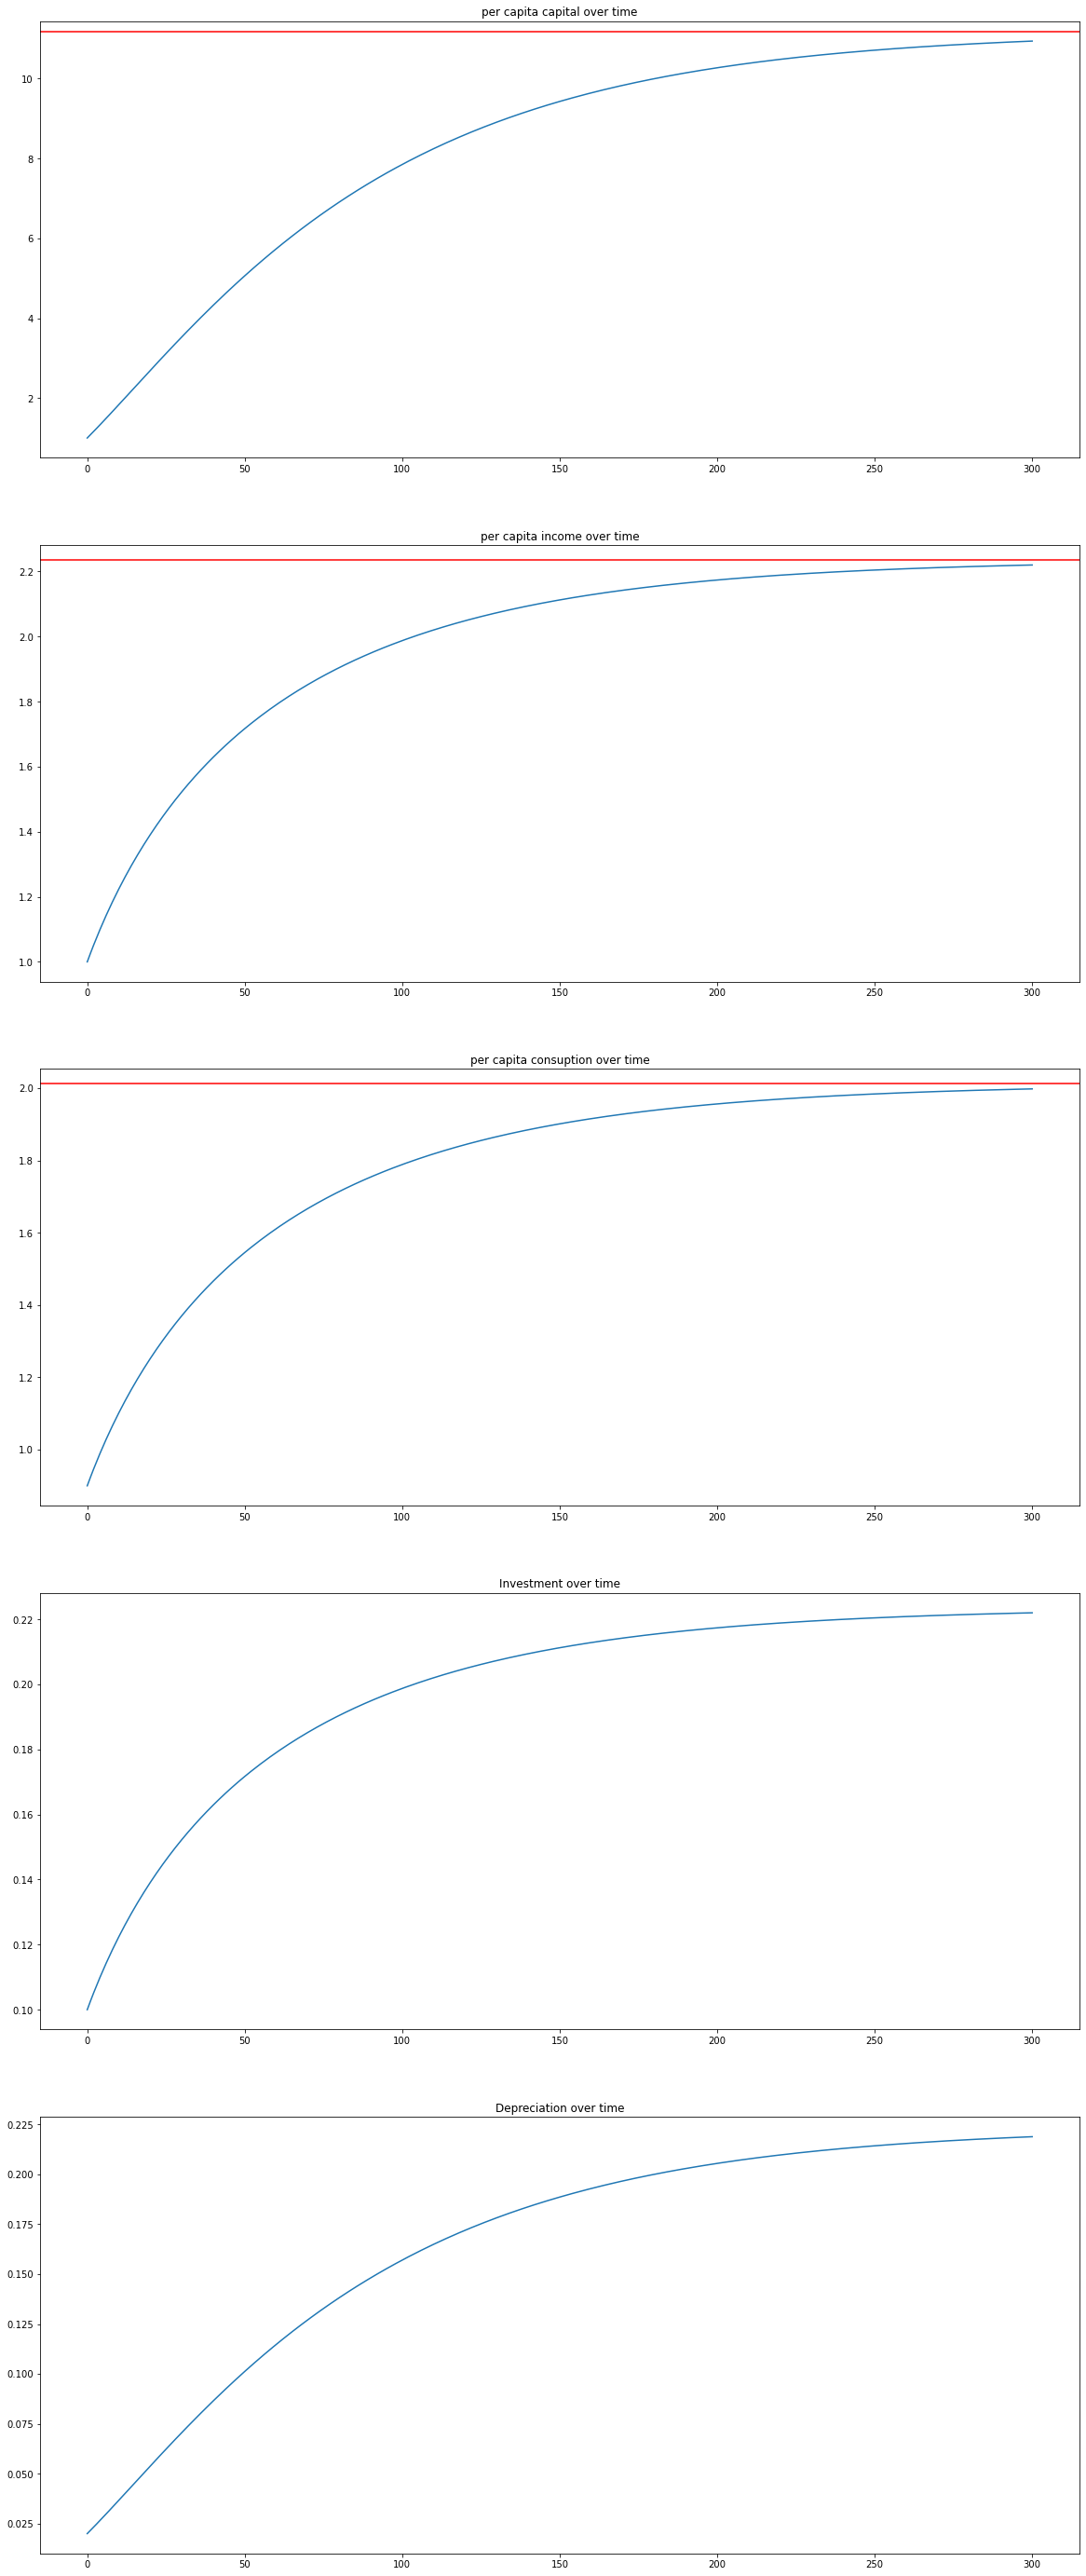

<Figure size 72x72 with 0 Axes>

In [3]:
sample_economy = Solow()
econ_df, agg_df, pc_df  = sample_economy.simulate(steps = 300)
k_star, y_star, c_star = sample_economy.steady_state()
fig, axs = plt.subplots(5, figsize = (20,50))
plt.figure(figsize=(1,1))


axs[0].plot(pc_df['k'])
axs[0].axhline(y=k_star, color='red')
axs[0].set_title('per capita capital over time')

axs[1].plot(pc_df['y'])
axs[1].axhline(y=y_star, color='red')
axs[1].set_title('per capita income over time')

axs[2].plot(pc_df['c'])
axs[2].axhline(y=c_star, color='red')
axs[2].set_title('per capita consuption over time')

axs[3].plot(agg_df['I'])
axs[3].set_title('Investment over time')

axs[4].plot(agg_df['D'])
axs[4].set_title('Depreciation over time')





### Model assumes longrun growth comes from technological progress, which it represents as changes in labor augmenting technology, this technological progress is exogenous to the model and is hence often called the exogenous growth model
### A growth of labor augmenting technology of just 1% per period is enough for income and consumption to quickly surpass its steady state

Text(0.5, 1.0, 'per capita consuption over time')

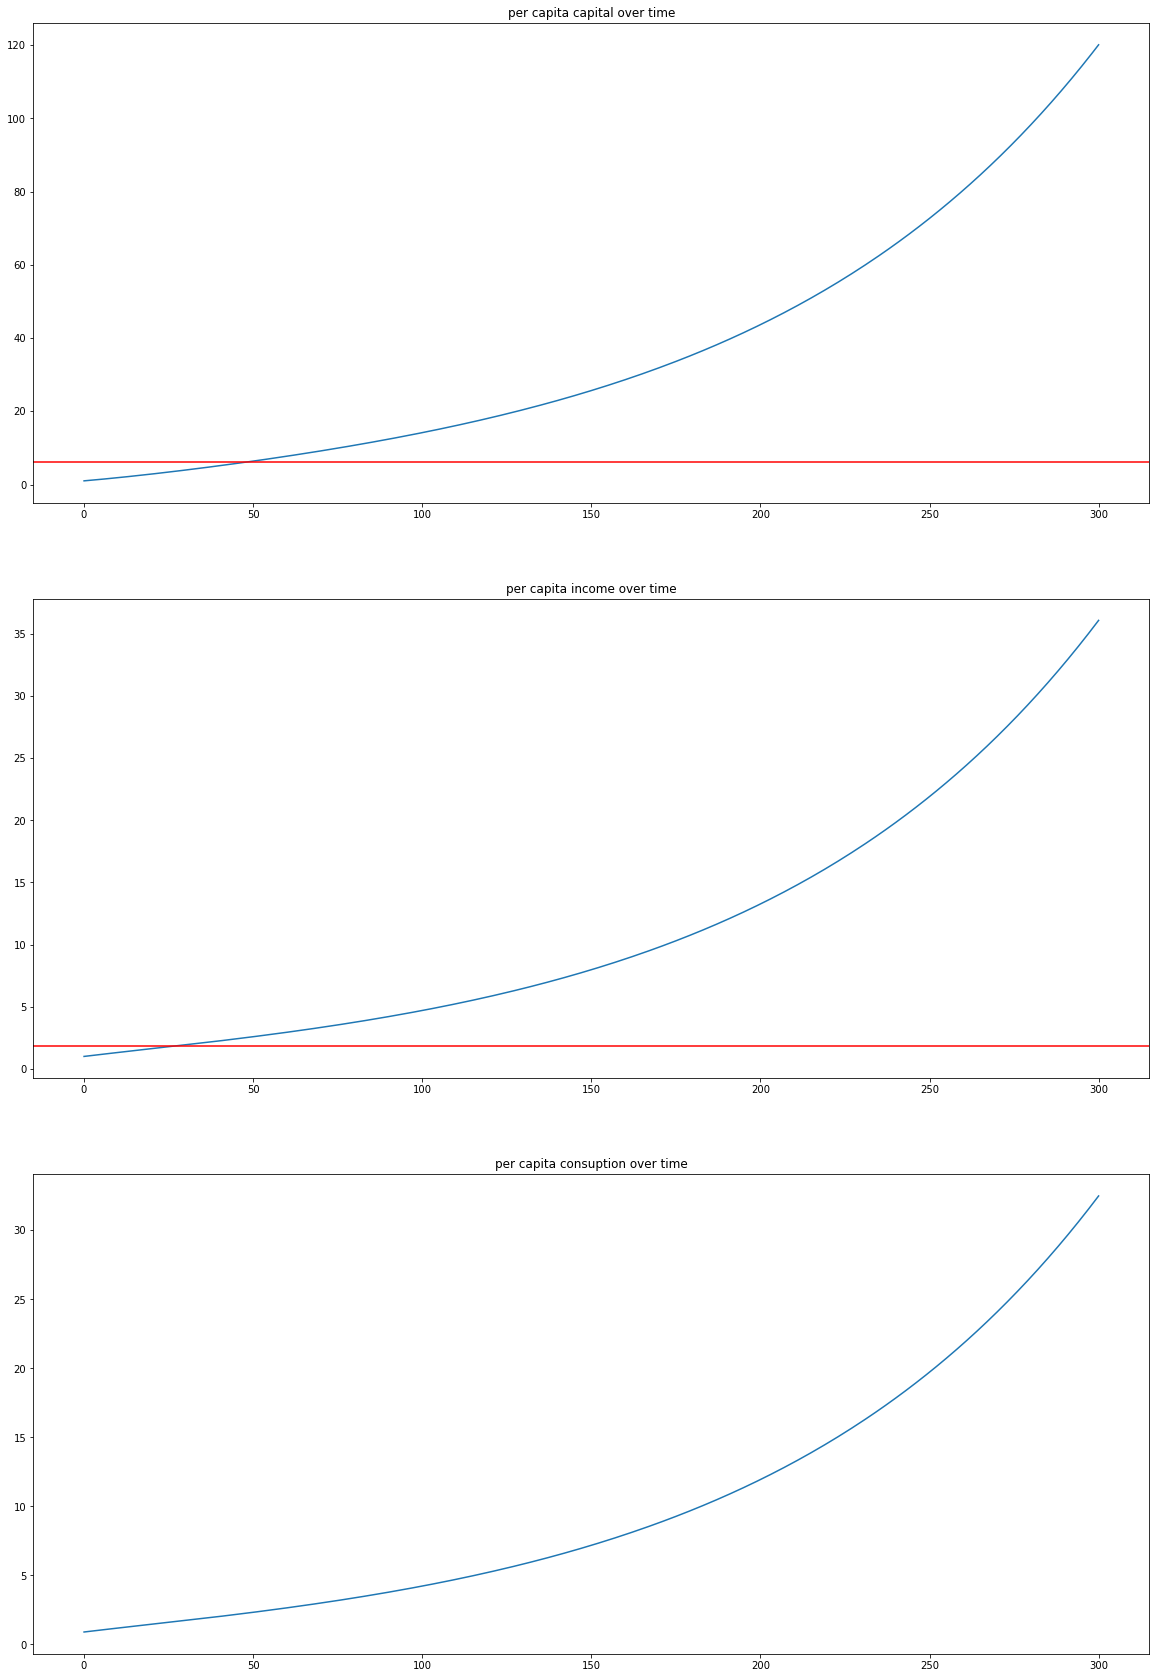

<Figure size 72x72 with 0 Axes>

In [4]:
sample_economy = Solow( g = 0.01)
econ_df, agg_df, pc_df  = sample_economy.simulate(steps = 300)
k_star, y_star, c_star = sample_economy.steady_state()
fig, axs = plt.subplots(3, figsize = (20,30))
plt.figure(figsize=(1,1))


axs[0].plot(pc_df['k'])
axs[0].axhline(y=k_star, color='red')
axs[0].set_title('per capita capital over time')

axs[1].plot(pc_df['y'])
axs[1].axhline(y=y_star, color='red')
axs[1].set_title('per capita income over time')

axs[2].plot(pc_df['c'])
axs[2].set_title('per capita consuption over time')



# Golden Rule saving rate
## used the golden_rule() method to find a golden rule steady state saving rate and used that to figure out what would be the consequences to income and consumption in the short and long term

### When saving rate is below golden rule the shift to a complete economy reduces consumption in the short run but increases income in short and long run


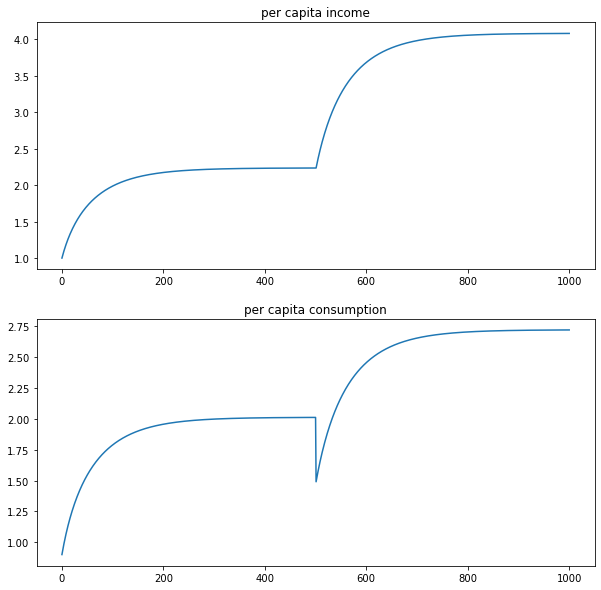

In [5]:
below_gr = Solow(s=0.1)
k_star = below_gr.steady_state()
gr_s, gr_k = below_gr.golden_rule()

econ_df, agg_df, pc_df  = below_gr.simulate(steps = 1000, shock_year = 500, s = gr_s)

y = pc_df['y']
c = pc_df['c']

fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('per capita income')
plt.plot(y)
plt.subplot(2,1,2)
plt.title('per capita consumption')
plt.plot(c)









### When saving rate is above the golden rule saving rate it immediately raises consumption, which later plateaus to a level higher than before
### Therefore it is irrational for a society to have a higher saving rate

0.3333333333333332
68.04138174397711
(124.99999999999991, 4.999999999999998, 2.499999999999999)


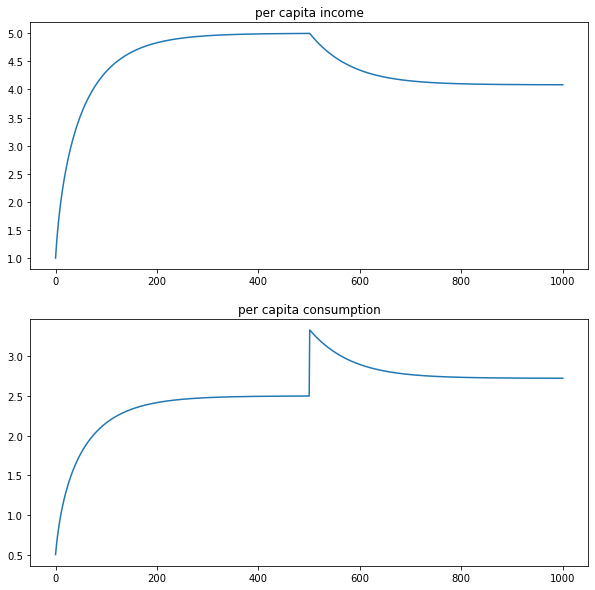

In [6]:
above_gr = Solow(s=0.5)
k_star = above_gr.steady_state()
gr_s, gr_k = above_gr.golden_rule()
print(gr_s)
print(gr_k)
print(k_star)
econ_df, agg_df, pc_df  = above_gr.simulate(steps = 1000, shock_year = 500, s = gr_s)

y = pc_df['y']
c = pc_df['c']

fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('per capita income')
plt.plot(y)
plt.subplot(2,1,2)
plt.title('per capita consumption')
plt.plot(c)